### Simple Linear Regression

Let's create a simple linear regression model with one dependent and one independent variable.

#### Import rquired Libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')
%matplotlib inline

print("Tensorflow Version ", tf.VERSION)
print("Numpy Version ", np.__version__)

Tensorflow Version  1.12.0
Numpy Version  1.15.4


#### Create dummy data

In [3]:
np.random.seed(00)
def random_points(num_points):
    vectors_set = []
    for i in range(0, num_points):
        x1 = np.random.normal(0.0, 0.55)
        y1 = 0.1 * x1 + 0.3 + np.random.normal(0.0, 0.03) # add e so that points do not fully corresponds to a line
        vectors_set.append([x1, y1])
    return vectors_set
v_s = random_points(num_points = 1000)

x_data = [v[0] for v in v_s]
y_data = [v[1] for v in v_s]

C:\Users\Praneet\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


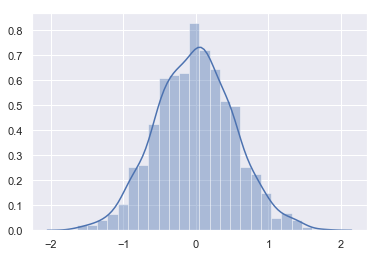

In [4]:
# plot the variation of x_data
sns.set(color_codes=True)
sns.distplot(x_data)

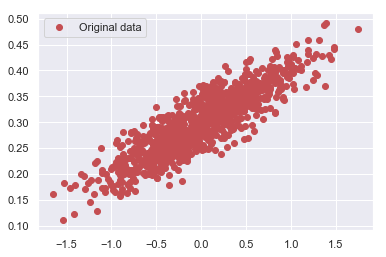

In [6]:
# plot the x_data and y_data
plt.plot(x_data, y_data, 'ro', label="Original data")
plt.legend(loc="best")
plt.show()

#### Predict the weight and bias based on generated data

In [7]:
print("We are having input data that is 'x_data' of length ", len(x_data))
print("\n")
print("We are having output data that is 'y_data' of length ", len(y_data))

We are having input data that is 'x_data' of length  1000


We are having output data that is 'y_data' of length  1000


Now, based on this input and output data we have to find out an equation that defines it.

Let's create an input variable 'W' that is weight and 'b' that is bias.

In [8]:
W = tf.Variable(tf.random_uniform(shape=[1], minval=-1.0, maxval=1.0)) #  -1 < W < 1
b = tf.Variable(tf.zeros(shape=[1]))

y = W * x_data + b # generalized equation

Let's see what we have taken the initial value of weight 'w' and bias 'b' for our model.

In [9]:
sess = tf.InteractiveSession()
print("Initial value of weight 'w' is ", tf.random_uniform(shape=[1], minval=-1.0, maxval=1.0).eval())

Initial value of weight 'w' is  [-0.959172]


In [10]:
print("Initial value of bias 'b' is ", tf.zeros(shape=[1]).eval())

Initial value of bias 'b' is  [0.]


Now let's see how our model learn to make value of weight near to 0.1 and value of bias near to 0.3.

For this firstly we have to see how well our model is performing. And this can be done with the help of cost function or loss function.

In [11]:
# create a loss function
# reduce_mean calculates the mean of the elements
loss = tf.reduce_mean(input_tensor = tf.square(y - y_data)) # average((predicted_value - actual_value)^2)

Now, after calculating the loss function we need to optimize(improve) it, so that we can achieve as minimum loss as possible in our model. In order to minimize the loss function we have to use an optimizer called <i>Gradient Descent Optimizer</i>.

What this alogorithm do is it starts with an initial values of a set of parameters(in our case W and b), and then the algorithm is alteratively adjusting the value of those variable in a way that, in the end of the process, the values of the variable minize the cost function.

In [12]:
# using optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss = loss)

Now we start the iterative process that will allow us to find the values of weight 'W' and bias 'b', by defining the model line that best fits the point of entry.

0 [-0.13072264] [0.2958963] 0.01605568


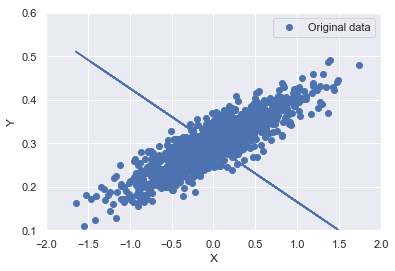

1 [-0.06469107] [0.2969446] 0.0085854605


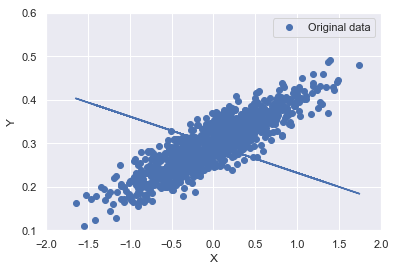

2 [-0.01762077] [0.29773402] 0.004789368


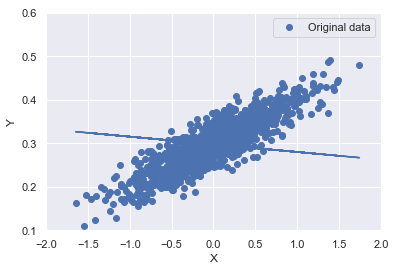

3 [0.01593357] [0.29829675] 0.0028603307


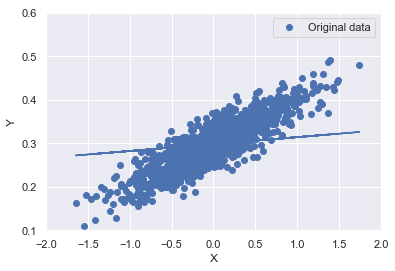

4 [0.03985299] [0.2986979] 0.0018800644


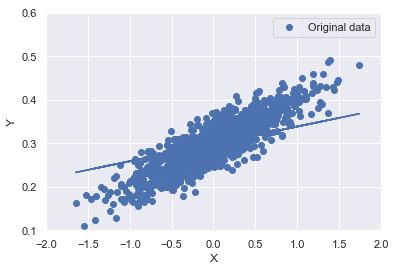

5 [0.05690409] [0.29898384] 0.0013819285


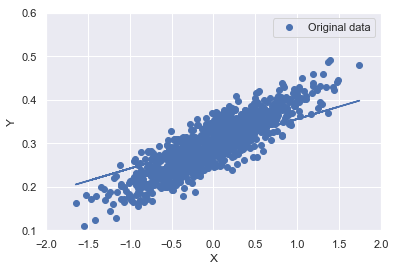

6 [0.06905907] [0.2991877] 0.0011287939


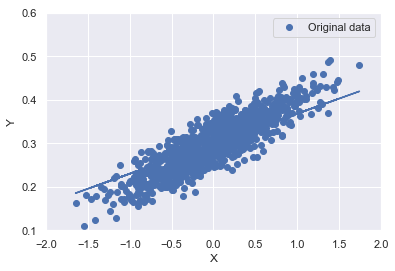

7 [0.07772382] [0.299333] 0.0010001602


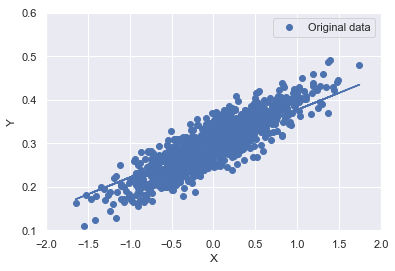

8 [0.08390054] [0.2994366] 0.00093479315


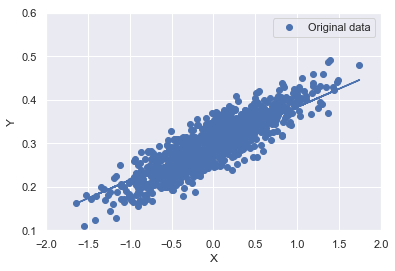

In [13]:
# initialize the global variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
saver = tf.train.Saver(max_to_keep=4) # Save the model

loss_variation = []

for step in range(0, 9): # over 8 iterations
    sess.run(train)
    new_W = sess.run(W)
    new_b = sess.run(b)
    new_loss = sess.run(loss)
    loss_variation.append(new_loss)
    saver.save(sess, './simple_linear_model', global_step=step)
    print(step, new_W, new_b, new_loss)
    
    # Graphic display
    plt.plot(x_data, y_data, 'bo', label="Original data")
    plt.plot(x_data, new_W * x_data + new_b)
    plt.xlabel('X')
    plt.xlim(-2, 2)
    plt.ylabel('Y')
    plt.ylim(0.1, 0.6)
    plt.legend(loc="best")
    plt.show()

Now we can viaualize from the above graphical display that after 8 iterations we get value of weight close to 0.1 and value of bias close to 0.3.

Now, visualize how our model loss improves over 8 inerations.

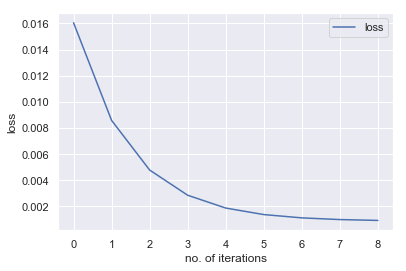

In [14]:
plt.plot(loss_variation, label="loss")
plt.xlabel("no. of iterations")
plt.ylabel("loss")
plt.legend(loc="best")
plt.show()

#### Restore the model

In [23]:
with tf.Session() as session:
    saver = tf.train.import_meta_graph('simple_linear_model-8.meta')
    saver.restore(session, tf.train.latest_checkpoint('./'))
    print("Final value of weight after 8 iterations is ", session.run(W))
    print("Final value of bias after 8 iterations is ", session.run(b))
    print("Final value of loss after 8 iterations is ", session.run(loss))

INFO:tensorflow:Restoring parameters from ./simple_linear_model-8
Final value of weight after 8 iterations is  [0.08390054]
Final value of bias after 8 iterations is  [0.2994366]
Final value of loss after 8 iterations is  0.00093479315


In [26]:
with tf.Session() as session:
    saver = tf.train.import_meta_graph('simple_linear_model-7.meta')
    saver.restore(session, './simple_linear_model-7')
    print("Final value of weight after 7 iterations is ", session.run(W))
    print("Final value of bias after 7 iterations is ", session.run(b))
    print("Final value of loss after 7 iterations is ", session.run(loss))

INFO:tensorflow:Restoring parameters from ./simple_linear_model-7
Final value of weight after 7 iterations is  [0.07772382]
Final value of bias after 7 iterations is  [0.299333]
Final value of loss after 7 iterations is  0.0010001602


In [27]:
with tf.Session() as session:
    saver = tf.train.import_meta_graph('simple_linear_model-6.meta')
    saver.restore(session, './simple_linear_model-6')
    print("Final value of weight after 6 iterations is ", session.run(W))
    print("Final value of bias after 6 iterations is ", session.run(b))
    print("Final value of loss after 6 iterations is ", session.run(loss))

INFO:tensorflow:Restoring parameters from ./simple_linear_model-6
Final value of weight after 6 iterations is  [0.06905907]
Final value of bias after 6 iterations is  [0.2991877]
Final value of loss after 6 iterations is  0.0011287939


#### Now you can create your own model, save it and restore it.